# Notebook to test for stationarity and seasonal adjustment in the German data

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %pylab inline

import os
from pathlib import Path
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa import seasonal

from src.data.data_class import Data

## import data

In [15]:
# import data
data_path = os.path.join(Path().cwd().parent, 'data', 'processed')
with open(os.path.join(data_path, 'df.pkl'), 'rb') as f:
    df = pickle.load(f) # load raw data
selection = pd.read_csv(os.path.join(data_path, 'selected_data.csv'))
df.describe()

var code,prod_ind,retail,prod_constr,CPI,unemp,trade_imp,trade_exp,GDP,cons_private,cons_gov,...,interest_rate_long,M3,M1,business_conf_manufacturing,cons_conf_tendency,CPI_house_energy,PCI_energy_domestic,PCI_energy_total,HICP_energy,HICP_excl_energy
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,108.000000,108.000000,104.000000,108.000000
mean,-0.000491,-0.000868,0.005500,0.004593,-0.003412,0.014359,0.013461,0.002374,0.001671,0.004267,...,3.464357,73.060391,65.053740,-6.727642,-8.894309,86.037069,87.530669,87.068088,84.324038,92.757326
std,0.025359,0.027611,0.080284,0.005335,0.034967,0.046262,0.042203,0.014031,0.017999,0.009444,...,2.514437,32.277879,43.152204,13.369695,7.160540,14.238683,20.013372,20.967881,20.161958,8.299962
min,-0.102694,-0.061626,-0.229221,-0.007503,-0.102564,-0.132714,-0.135558,-0.100916,-0.109171,-0.022185,...,-0.613512,28.248220,16.946750,-42.200000,-24.900000,53.904523,56.161474,54.461309,49.900000,79.986310
25%,-0.011806,-0.014273,-0.024285,0.000977,-0.023810,-0.008320,-0.008075,-0.000355,-0.001934,-0.001296,...,1.344785,41.916195,27.984575,-15.400000,-14.850000,73.952681,67.028569,66.173776,65.075000,85.575000
50%,0.000879,-0.002828,-0.001704,0.003770,-0.002415,0.013158,0.014442,0.002825,0.002422,0.004227,...,3.862942,70.666810,56.646770,-6.100000,-8.300000,86.957726,94.290366,93.498440,90.000000,91.950000
75%,0.013364,0.009386,0.028114,0.007269,0.017010,0.039105,0.037157,0.006739,0.006182,0.008042,...,5.136745,93.605800,86.999785,0.800000,-3.550000,99.854654,103.216667,103.033607,101.850000,99.525000
max,0.069800,0.179337,0.473864,0.028201,0.105263,0.173879,0.136180,0.082374,0.108160,0.044418,...,8.535833,145.839800,178.152800,25.600000,2.800000,109.442454,156.933333,161.433333,115.000000,109.700000


In [11]:
# df.index = pd.to_datetime(df.index)
# df.index = df.index.to_period('Q')

## seasonal adjustment

C:\Users\yanni\AppData\Local\Temp/ipykernel_10608/3376058479.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

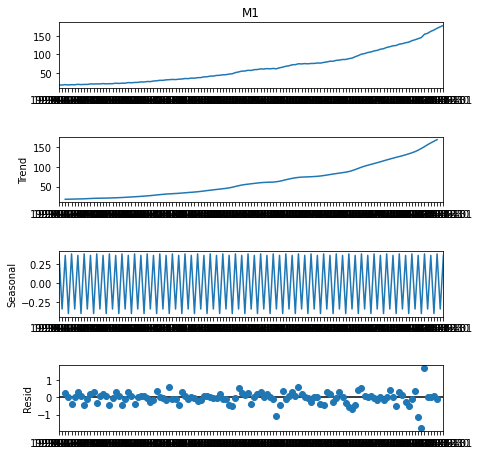

In [17]:
# plot composition
plot_all = False    # carefull, super slow!
plot_var = ['M1']
if plot_all:
    for name, values in df.iteritems():
        decomp = seasonal.seasonal_decompose(values.dropna(), period=4)
        fig = plt.figure()
        fig = decomp.plot()
        fig.set_size_inches(7, 7)
        fig.show()
elif len(plot_var) > 0:
    for v in plot_var:
        values = df[v]
        decomp = seasonal.seasonal_decompose(values.dropna(), period=4)
        fig = plt.figure()
        fig = decomp.plot()
        fig.set_size_inches(7, 7)
        fig.show()

In [16]:
df_sa = df.copy()
for name, values in df.iteritems():
    decomp = seasonal.seasonal_decompose(values.dropna(), period=4)
    sa_adjust = decomp.seasonal
    series_adjusted = values-sa_adjust
    df_sa[name] = series_adjusted